<div style="text-align: center;">
    <h1>‚ú® <strong>Nom et Pr√©nom : Laakel Gauzi Soumaya</strong> ‚ú®</h1>
    <h3><strong>Module : Apprentissage automatique</strong></h3>
    <h4><em>MST IASD/S1 2023-2024</em></h4>
    <hr>
    <h2><strong>Exercice 2 : R√©gression avec SVM - Prix M√©dian des Maisons en Californie</strong></h2>
    <p><i>Le California Housing Dataset contient des informations socio-√©conomiques sur les maisons en Californie, collect√©es lors du recensement am√©ricain de 1990. Il comprend des variables comme le revenu m√©dian, l'√¢ge moyen des maisons, le nombre de chambres, et la population dans chaque bloc de donn√©es g√©ographiques.</i></p>
</div>


# √âtape 1: Importation des Biblioth√®ques et des Donn√©es

In [1]:
# Importation des biblioth√®ques n√©cessaires
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Chargement de la base d'exemples "California Housing Dataset"
dataset = fetch_california_housing()

# √âtape 2: Exploration des donn√©es
**Phase de d√©couverte et d'observation pour ainsi collecter de l'information sur les donn√©es en vue de prendre des d√©cisions plus tard**
## 2.1 Description
Dans cette √©tape nous allons :
+ Consulter nos donn√©es
+ Identifier notre √©tiquette ou target
+ D√©crire nos types de donn√©es

In [3]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
# Conversion des donn√©es en DataFrame pour une meilleure manipulation
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['MedHouseVal'] = dataset.target


In [5]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

### Dans le California Housing Dataset, les variables d'entr√©e (features) et de sortie (target) sont les suivantes :
   #### Variables d'entr√©e (features)
+  **MedInc :** Revenu m√©dian des m√©nages dans la zone (en dizaines de milliers de dollars).
+  **HouseAge :** √Çge m√©dian des maisons dans la zone (en ann√©es).
+  **AveRooms :** Nombre moyen de pi√®ces par logement dans la zone.
+  **AveBedrms :** Nombre moyen de chambres par logement dans la zone.
+  **Population :** Population totale de la zone.
+  **AveOccup :** Nombre moyen de r√©sidents par logement dans la zone.
+  **Latitude :** Latitude g√©ographique de la zone.
+  **Longitude :** Longitude g√©ographique de la zone.
  #### Variable de sortie (target)   
+ **MedHouseVal :** Valeur m√©diane des maisons dans la zone (en centaines de milliers de dollars). Cette variable est celle qu‚Äôon cherche souvent √† pr√©dire dans des mod√®les de r√©gression.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


   Notre dataset contient 
* **`20640 lignes`** et **`9 colonnes`**, 
* **`9 des colonnes`** contiennent des valeurs num√©riques (de type float64)

### Valeurs manquantes

In [7]:
df.isna()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False     False     False   

       Longitude  MedHouseVal  
0          False        False  
1          False        False  
2          False        False  
3          False        False  
4          False        False  
...          ...          ...  
20635      False        False  
20636      False        False  
20637      False        False  
20638      False        False  
20639      False        False  

[20640 rows x 9 columns]

In [8]:
df.sum().isna()

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

   Dans ce cas, le r√©sultat montre **False** pour chaque colonne, ce qui signifie **qu'il n'y a aucune valeur manquante dans toutes les colonnes du dataset** :
   **MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, et MedHouseVal** sont toutes compl√®tes.

### doublons dans le dataset

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

La sortie montre que chaque ligne a la valeur **False**, ce qui signifie **qu'il n'y a aucun doublon dans le dataset**. Toutes les lignes sont **uniques**.

## 2.2 Visualisation

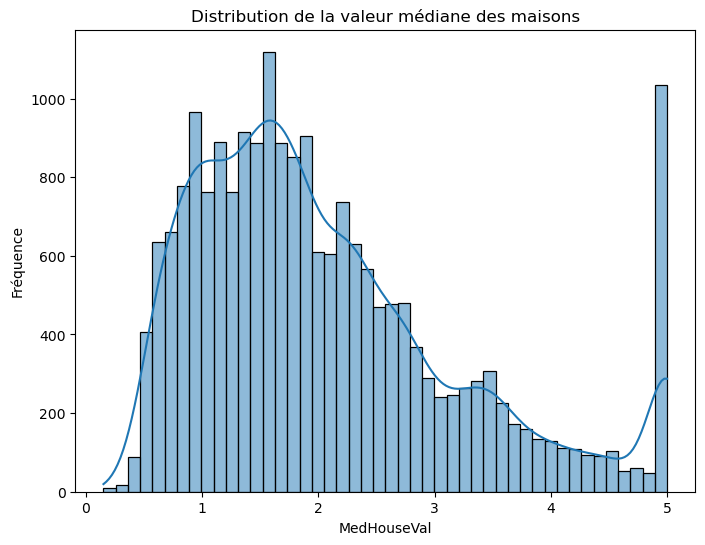

In [10]:
# Distribution de la variable MedHouseVal
plt.figure(figsize=(8, 6))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title("Distribution de la valeur m√©diane des maisons")
plt.xlabel("MedHouseVal")
plt.ylabel("Fr√©quence")
plt.show()

Ce graphique repr√©sente **la distribution de la valeur m√©diane des maisons**. On observe un pic de fr√©quence autour de la valeur 2, indiquant que la plupart des maisons ont une valeur m√©diane autour de ce niveau. Cependant, il y a un pic notable vers la valeur 5 , qui pourrait repr√©senter un effet de plafonnement (par exemple, les valeurs au-del√† de 5 sont peut-√™tre regroup√©es dans cette cat√©gorie maximale).

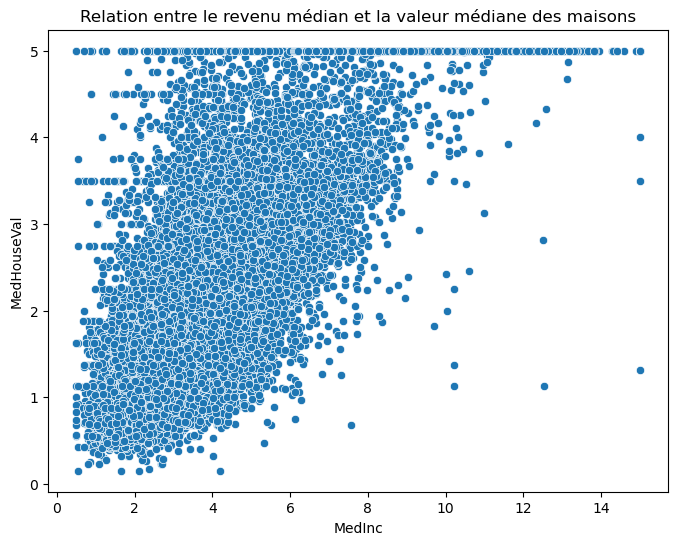

In [11]:
# Scatter plot entre MedInc et MedHouseVal
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)
plt.title("Relation entre le revenu m√©dian et la valeur m√©diane des maisons")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.show()

Ce graphique en nuage de points montre la relation entre le revenu m√©dian (axe des abscisses, MedInc) et la valeur m√©diane des maisons (axe des ordonn√©es, MedHouseVal): 

+ On observe une tendance g√©n√©rale o√π une augmentation du revenu m√©dian est associ√©e √† une augmentation de la valeur m√©diane des maisons, ce qui sugg√®re une corr√©lation positive entre ces deux variables.
+ Cependant, de nombreux points se situent √† la valeur de MedHouseVal = 5, indiquant probablement un plafonnement des donn√©es pour les valeurs sup√©rieures √† 5, comme vu dans le graphique pr√©c√©dent.

Cette relation positive confirme que les zones avec un revenu plus √©lev√© tendent √† avoir des maisons plus ch√®res, mais le plafonnement √† 5 pour la valeur des maisons peut limiter l'interpr√©tation pr√©cise pour les logements tr√®s on√©reux.

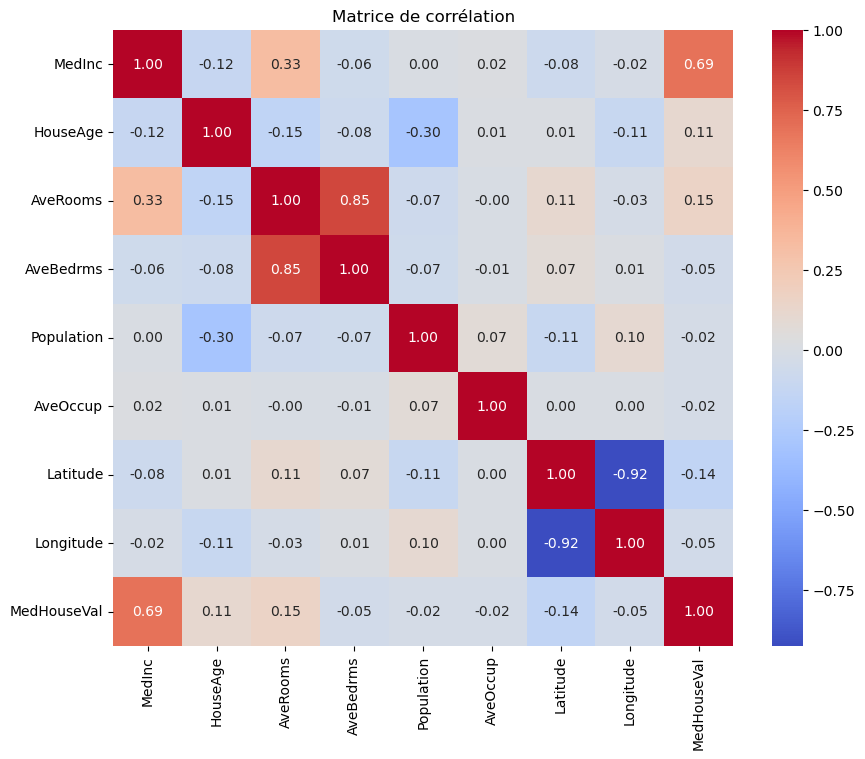

In [12]:
# Heatmap des corr√©lations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corr√©lation")
plt.show()

Cette matrice de corr√©lation montre les relations entre diff√©rentes variables de l'ensemble de donn√©es, avec des valeurs allant de -1 (corr√©lation n√©gative parfaite) √† 1 (corr√©lation positive parfaite). Ce qui ressort de mani√®re notable est la forte corr√©lation positive de **0,69** entre le revenu m√©dian **(MedInc)** et la valeur m√©diane des maisons **(MedHouseVal)**, ce qui confirme que les zones avec un revenu plus √©lev√© tendent √† avoir des maisons plus ch√®res. D'autres corr√©lations √©lev√©es incluent celle entre le nombre moyen de chambres **(AveRooms)** et le nombre moyen de chambres √† coucher **(AveBedrms)** √† **0,85**, ce qui est attendu car les deux variables mesurent des aspects similaires de la taille des logements. Il est √©galement important de noter la forte corr√©lation n√©gative entre la latitude et la longitude (-0,92), probablement due √† la distribution g√©ographique des donn√©es.

**La matrice de corr√©lation montre quelques relations lin√©aires partielles, mais la majorit√© des variables n'ont pas de fortes corr√©lations lin√©aires avec la variable cible (MedHouseVal). En g√©n√©ral, cela sugg√®re que les donn√©es ne sont pas enti√®rement lin√©aires. Un mod√®le capable de capturer des relations non lin√©aires pourrait mieux s'adapter √† ces donn√©es**

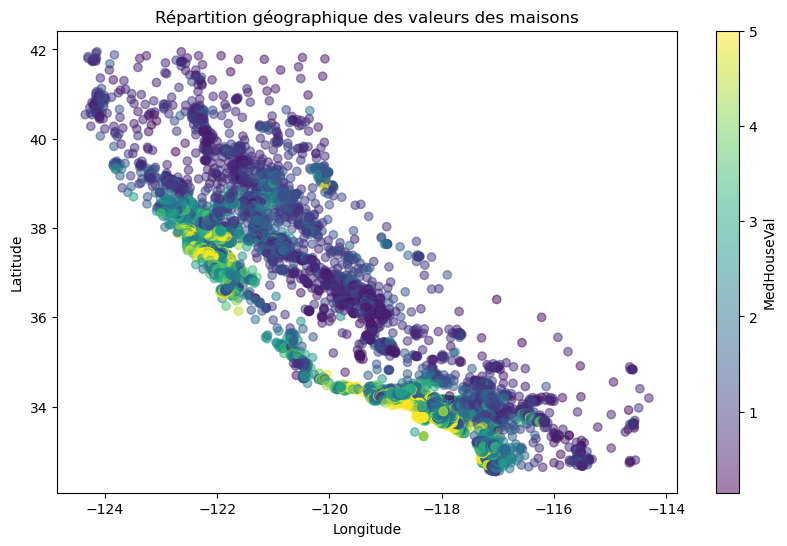

In [13]:
# Distribution g√©ographique
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['MedHouseVal'], cmap='viridis', alpha=0.5)
plt.colorbar(label='MedHouseVal')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("R√©partition g√©ographique des valeurs des maisons")
plt.show()

Ce graphique montre la r√©partition g√©ographique des valeurs m√©dianes des maisons en fonction de la latitude et de la longitude. Les points sont color√©s selon la valeur m√©diane des maisons (MedHouseVal), allant de 1 (en violet fonc√©) √† 5 (en jaune).

+ Les zones c√¥ti√®res (notamment pr√®s de la longitude -118) pr√©sentent des valeurs m√©dianes de maisons plus √©lev√©es, indiqu√©es par des couleurs plus claires (jaune/vert).
+ √Ä mesure que l'on s'√©loigne de la c√¥te vers l'int√©rieur (plus √† l'est et au nord), les valeurs m√©dianes des maisons tendent √† diminuer, passant √† des couleurs plus sombres.

**La proximit√© de la c√¥te semble √™tre un facteur important pour la hausse des valeurs des maisons, probablement en raison de l'attrait des zones c√¥ti√®res et de la demande √©lev√©e.**

# √âtape 3 : S√©paration et Normalisation

In [46]:
# S√©paration des donn√©es en ensembles d'entra√Ænement et de test
X = df.drop('MedHouseVal', axis=1)  # Caract√©ristiques
y = df['MedHouseVal']  # Variable cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Normalisation des donn√©es (√©chelle Standard)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# √âtape 4: Impl√©mentation Personnalis√©e de SVM pour la R√©gression

La r√©gression SVM vise √† pr√©dire une valeur continue tout en minimisant une perte sp√©cifique. La fonction de co√ªt n'inclut pas de p√©nalit√© lorsque la diff√©rence entre la valeur pr√©dite et la vraie valeur est inf√©rieure √† un seuil ùúñ. En dehors de ce **tube
œµ-sensible**, une p√©nalit√© proportionnelle est appliqu√©e.
## Formulation math√©matique:
L'objectif est de r√©soudre le probl√®me d'optimisation suivant :
$$ \min_{w, b, \xi, \xi^*} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*) $$
sous les contraintes :
$$
y_i - (w^T x_i + b) \leq \epsilon + \xi_i \quad \text{et} \quad (w^T x_i + b) - y_i \leq \epsilon + \xi_i^*
$$

avec 

$$
\xi_i, \xi_i^* \geq 0.
$$



![Illustration de la r√©gression SVM](https://cedric.cnam.fr/vertigo/cours/ml2/_images/algnoyaux05.png)




L'impl√©mentation de ce mod√®le de **r√©gression SVM** repose sur le principe des **vecteurs de support et de l'utilisation d'un noyau pour transformer les donn√©es dans un espace o√π les relations non lin√©aires deviennent lin√©aires**. Voici les √©tapes cl√©s du principe de cette impl√©mentation :
### 1- Initialisation des Hyperparam√®tres et Variables
+ **Hyperparam√®tres :** **`gamma`**, **`learning_rate`**, **`lambda_param`**, **`epsilon`**, **`n_iters`**,**`kernel='rbf'`** sont fix√©s lors de l'initialisation pour contr√¥ler l'apprentissage et la r√©gularisation du mod√®le.
+ **Coefficients :** Les valeurs de **alpha** (variables duales qui agissent sur chaque √©chantillon) et **b (biais)** sont initialis√©es. **alpha est un vecteur de taille √©gale au nombre d'√©chantillons.**

### 2- Calcul du Noyau RBF
Pour g√©rer la non-lin√©arit√© des donn√©es, on utilise un noyau RBF qui projette les donn√©es dans un espace de caract√©ristiques de dimension sup√©rieure. Le noyau RBF calcule la similarit√© entre les points en fonction de la distance entre eux, en utilisant un facteur d‚Äô√©chelle gamma. Le noyau RBF est donn√© par :
$$
K(x_i, x_j) = \exp(-\gamma \cdot ||x_i - x_j||^2)
$$
Cette transformation permet de traiter des relations complexes entre les donn√©es.
### 3- Entra√Ænement du mod√®le (fit) Descente de gradient

L'algorithme d'entra√Ænement consiste √† utiliser **la descente de gradient*** pour ajuster les param√®tres alpha (les coefficients associ√©s aux √©chantillons d'entra√Ænement) et b (le biais). Le processus de mise √† jour se fait comme suit :

+ **Matrice de noyau (K) :** La matrice de noyau K est calcul√©e entre tous les √©chantillons d'entra√Ænement, ce qui donne une mesure de similarit√© entre chaque √©chantillon.
+ **Pr√©dictions et erreurs :** Les pr√©dictions sont faites en calculant np.dot(K, self.alpha) + self.b, puis les erreurs sont calcul√©es comme la diff√©rence entre les vraies valeurs y et les pr√©dictions.
+ **Mise √† jour des coefficients (alpha) et du biais (b) :** Les alpha sont mis √† jour uniquement pour les √©chantillons dont l'erreur est sup√©rieure √† un certain seuil epsilon. La mise √† jour des alpha est effectu√©e en fonction de l'erreur et de la r√©gularisation (pour √©viter des valeurs trop grandes).
### 4- S√©lection des vecteurs de support
√Ä la fin de l'entra√Ænement, les √©chantillons qui ont une erreur sup√©rieure √† epsilon sont consid√©r√©s comme des vecteurs de support. Ces √©chantillons sont cruciaux pour la construction du mod√®le, car ils d√©finissent la fronti√®re de d√©cision dans un espace de caract√©ristiques transform√© 
### 5- Pr√©diction pour de Nouvelles Donn√©es

Lors de la pr√©diction pour de nouveaux √©chantillons, le mod√®le utilise les vecteurs de support pour effectuer les calculs :

+ Calculer les similarit√©s entre les nouveaux √©chantillons et les vecteurs de support √† l'aide du noyau.
+ Faire des pr√©dictions en calculant une combinaison lin√©aire des valeurs alpha associ√©es aux vecteurs de support, plus le biais b

In [24]:
import numpy as np

class SVR_Regressor:
    def __init__(self, kernel='rbf', gamma=0.1, learning_rate=0.00001, lambda_param=0.01, epsilon=0.1, n_iters=1000):
        self.kernel = kernel
        self.gamma = gamma
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.epsilon = epsilon
        self.n_iters = n_iters
        self.alpha = None
        self.b = 0
        self.support_vectors_ = None  # Attribut pour stocker les vecteurs de support
        self.support_vector_indices_ = None  # Stocke les indices des vecteurs de support

    def _rbf_kernel(self, X, Y):
        """Noyau RBF"""
        sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(Y**2, axis=1) - 2 * np.dot(X, Y.T)
        return np.exp(-self.gamma * sq_dists)

    def _apply_kernel(self, X, Y):
        """Applique le noyau choisi (ici, RBF)"""
        if self.kernel == 'rbf':
            return self._rbf_kernel(X, Y)
        else:
            raise ValueError("Noyau non support√©. Utilisez 'rbf'.")

    def fit(self, X, y):
        n_samples = X.shape[0]
        K = self._apply_kernel(X, X)  # Matrice de noyau
        self.alpha = np.zeros(n_samples)

        for i in range(self.n_iters):
            prediction = np.dot(K, self.alpha) + self.b
            error = y - prediction

            # Mise √† jour des alpha uniquement si l'erreur d√©passe epsilon
            mask = np.abs(error) > self.epsilon
            dalpha = -self.lr * (error[mask] + 2 * self.lambda_param * self.alpha[mask])
            self.alpha[mask] -= dalpha
            self.b -= self.lr * np.sum(error[mask]) / n_samples

            # Affichage de la moyenne de l'erreur pour surveiller la convergence
            if i % 100 == 0:
                error_mean = np.mean(np.abs(error))
                print(f"Iteration {i}: Error mean = {error_mean}")

        # S√©lection des indices des vecteurs de support
        self.support_vector_indices_ = np.where(np.abs(y - (np.dot(K, self.alpha) + self.b)) > self.epsilon)[0]
        self.support_vectors_ = X[self.support_vector_indices_]

    def predict(self, X):
        """Pr√©dictions sur les donn√©es d'entr√©e en utilisant les vecteurs de support"""

        # V√©rifier et ajuster les dimensions de X et des vecteurs de support
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)  # Si X est un vecteur 1D, convertir en matrice 2D
        if len(self.support_vectors_.shape) == 1:
            self.support_vectors_ = self.support_vectors_.reshape(-1, 1)  # Si les vecteurs de support sont en 1D, convertir en 2D

        # V√©rifier que les dimensions de X et des vecteurs de support sont compatibles
        if X.shape[1] != self.support_vectors_.shape[1]:
            raise ValueError(f"Les dimensions de X ({X.shape[1]}) et des vecteurs de support ({self.support_vectors_.shape[1]}) ne sont pas compatibles pour le produit scalaire.")

        # Appliquer le noyau RBF
        K_sv = self._apply_kernel(X, self.support_vectors_)

        # Calculer les pr√©dictions
        return np.dot(K_sv, self.alpha[self.support_vector_indices_]) + self.b



In [25]:
clf = SVR_Regressor(gamma=0.1, learning_rate=0.00001, lambda_param=0.01, epsilon=0.1, n_iters=1000)
clf.fit(X_train_scaled, y_train)


Iteration 0: Error mean = 2.071946937378876
Iteration 100: Error mean = 0.7436594264701695
Iteration 200: Error mean = 0.6656313426124868
Iteration 300: Error mean = 0.6272768866270353
Iteration 400: Error mean = 0.6008679461371926
Iteration 500: Error mean = 0.5807040082021997
Iteration 600: Error mean = 0.5645818303458696
Iteration 700: Error mean = 0.5515543527107457
Iteration 800: Error mean = 0.5409694740190962
Iteration 900: Error mean = 0.5323004733113655


In [26]:
# Pr√©dictions
predictions = clf.predict(X_test_scaled)
print(predictions)

[0.8395489  1.60659829 2.54188006 ... 4.37580223 1.1344529  1.86670214]


In [28]:
# Calcul de l'erreur absolue moyenne (MAE)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Calcul du coefficient de d√©termination (R¬≤)
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Calcul de l'erreur quadratique moyenne (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calcul des m√©triques
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Affichage des r√©sultats
print(f"SVM Regression Mean Squared Error: {mse}")
print(f"SVM Regression Mean Absolute Error: {mae}")
print(f"SVM Regression R¬≤ Score: {r2}")


SVM Regression Mean Squared Error: 0.5748133234879369
SVM Regression Mean Absolute Error: 0.5280904118613047
SVM Regression R¬≤ Score: 0.5613481492933836


+ Une **MSE** de 0.5748 indique que, en moyenne, les erreurs (les √©carts entre les valeurs pr√©dites et r√©elles) sont relativement petites, mais il y a encore une marge d'am√©lioration pour r√©duire l'erreur.
+ Une **MAE** de 0.5281 indique que, en moyenne, l'√©cart entre les pr√©dictions et les valeurs r√©elles est de 0.528. Cela signifie que les pr√©dictions sont assez proches des valeurs r√©elles, mais le mod√®le pourrait encore √™tre am√©lior√© pour r√©duire cette erreur.
+ Un **R¬≤** de 0.5613 signifie que le mod√®le explique environ 56% de la variance des donn√©es. C'est un bon r√©sultat, mais cela sugg√®re qu'il y a encore de l'espace pour am√©liorer le mod√®le, soit en ajustant les param√®tres, soit en utilisant d'autres techniques de r√©gularisation ou de s√©lection de caract√©ristiques.

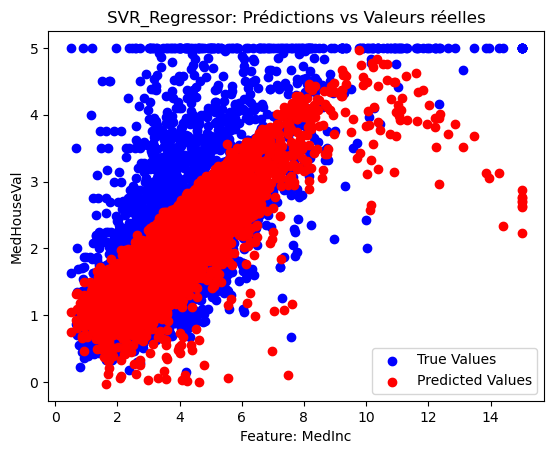

In [32]:
# Visualisation des donn√©es et des pr√©dictions pour toutes les caract√©ristiques
plt.scatter(X_test[feature_name], y_test, color='blue', label='True Values')
plt.scatter(X_test[feature_name], predictions, color='red', label='Predicted Values')
plt.xlabel(f'Feature: {feature_name}')
plt.ylabel('MedHouseVal')
plt.title('SVR_Regressor: Pr√©dictions vs Valeurs r√©elles')
plt.legend()
plt.show()


### SVR impl√©ment√©
+ Les points bleus (Valeurs r√©elles) : Repr√©sentent les valeurs observ√©es de MedHouseVal pour les √©chantillons de test en fonction de la caract√©ristique MedInc. On observe une tendance g√©n√©rale, o√π les valeurs de MedHouseVal augmentent avec MedInc, ce qui est logique, car des revenus plus √©lev√©s sont souvent corr√©l√©s avec des valeurs immobili√®res plus √©lev√©es.

+ Les points rouges (Valeurs pr√©dites) : Repr√©sentent les valeurs de MedHouseVal pr√©dites par le mod√®le SVR pour les m√™mes valeurs de MedInc. On constate que les pr√©dictions suivent approximativement la tendance des valeurs r√©elles, mais il y a des √©carts visibles.

+ √âcarts entre les pr√©dictions et les valeurs r√©elles :

  + Pour les faibles valeurs de MedInc (en bas √† gauche), les pr√©dictions semblent relativement proches des valeurs r√©elles, ce qui indique que le mod√®le parvient bien √† capturer la tendance dans cette r√©gion.
  + Pour les valeurs √©lev√©es de MedInc (vers la droite de l'image), on observe une dispersion plus large des pr√©dictions autour des valeurs r√©elles. Cela pourrait indiquer une difficult√© du mod√®le √† bien pr√©dire les valeurs de MedHouseVal pour les revenus plus √©lev√©s. Ce ph√©nom√®ne peut √™tre d√ª √† une quantit√© limit√©e de donn√©es dans cette gamme de MedInc ou √† une complexit√© du mod√®le insuffisante pour capturer la relation dans cette r√©gion.

# √âtape 5 : Utilisation de SVR de scikit-learn

In [36]:
model_SVR=SVR(gamma=0.1,epsilon=0.1)
model_SVR.fit(X_train_scaled, y_train)

SVR(gamma=0.1)

In [40]:
# Pr√©dictions
predictions1 = model_SVR.predict(X_test_scaled)
print(predictions)

[0.53633735 1.61244284 3.47330149 ... 4.76280671 0.71419999 1.74907884]


In [43]:
# Calcul de l'erreur absolue moyenne (MAE)
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Calcul du coefficient de d√©termination (R¬≤)
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Calcul de l'erreur quadratique moyenne (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calcul des m√©triques
mse = mean_squared_error(y_test, predictions1)
mae = mean_absolute_error(y_test, predictions1)
r2 = r2_score(y_test, predictions1)

# Affichage des r√©sultats
print(f"SVR de scikit learn Mean Squared Error: {mse}")
print(f"SVR scikit learn Mean Absolute Error: {mae}")
print(f"SVR scikit learn R¬≤ Score: {r2}")


SVR de scikit learn Mean Squared Error: 0.36578944823936493
SVR scikit learn Mean Absolute Error: 0.4050112687246496
SVR scikit learn R¬≤ Score: 0.7208585607140736


Les r√©sultats montrent que le mod√®le SVR de scikit-learn atteint un MSE de 0.366, un MAE de 0.405 et un R¬≤ de 0.721, indiquant une pr√©cision raisonnable avec des erreurs mod√©r√©es.

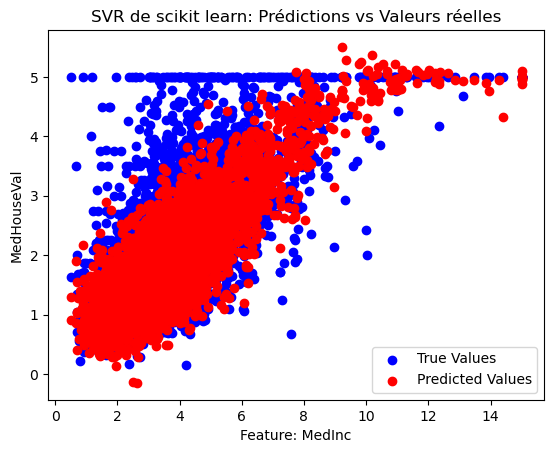

In [45]:
# Visualisation des donn√©es et des pr√©dictions pour toutes les caract√©ristiques
plt.scatter(X_test[feature_name], y_test, color='blue', label='True Values')
plt.scatter(X_test[feature_name], predictions1, color='red', label='Predicted Values')
plt.xlabel(f'Feature: {feature_name}')
plt.ylabel('MedHouseVal')
plt.title('SVR de scikit learn: Pr√©dictions vs Valeurs r√©elles')
plt.legend()
plt.show()


### SVR de Scikit learn

+ Points bleus (Valeurs r√©elles) : Ils repr√©sentent les valeurs r√©elles de MedHouseVal pour chaque MedInc. On observe une corr√©lation positive : √† mesure que MedInc augmente, MedHouseVal tend √† augmenter √©galement.

+ Points rouges (Valeurs pr√©dites) : Ils repr√©sentent les valeurs pr√©dites par le mod√®le SVR. Les pr√©dictions suivent globalement la tendance des valeurs r√©elles, mais montrent des √©carts, notamment aux extr√©mit√©s.

+ Observation des √©carts : Pour les valeurs √©lev√©es de MedInc, les pr√©dictions sont plus dispers√©es et tendent √† d√©vier davantage des valeurs r√©elles.

# √âtape 5 :Comparaison entre le SVR impl√©ment√© et le SVR de Scikit-learn

### Comparaison des m√©triques entre le SVR impl√©ment√© et le SVR de scikit-learn

| **M√©triques**           | **SVR Impl√©ment√©**   | **SVR scikit-learn** |
|-------------------------|----------------------|----------------------|
| **Mean Squared Error**  | 0.5748133234879369   | 0.36578944823936493  |
| **Mean Absolute Error** | 0.5280904118613047   | 0.4050112687246496   |
| **R¬≤ Score**            | 0.5613481492933836   | 0.7208585607140736   |

### Conclusion :
- Le **SVR impl√©ment√©** pr√©sente des valeurs de **Mean Squared Error (MSE)** et de **Mean Absolute Error (MAE)** plus √©lev√©es que celles du mod√®le **SVR scikit-learn**.
- Le **R¬≤ Score** du **SVR scikit-learn** est √©galement sup√©rieur, indiquant que ce mod√®le s'ajuste mieux aux donn√©es.
- En r√©sum√©, l'impl√©mentation de **scikit-learn** surpasse celle manuelle en termes de performance globale.
